# Sesión 06 - Manejo de Modelos de Clasificación para entornos operativos

*Objetivo*

- Aplicar algoritmos de clasificación para identificar eventos operacionales críticos en la industria petrolera.
- Evaluar el rendimiento de diferentes clasificadores.
- Interpretar los resultados y la matriz de confusión.
- Analizar la eficiencia en pozos productores.

In [1]:
!python --version


Python 3.12.1


## 0. Carga de Librerías

In [3]:
# Instalación de dependencias del nuevo codespace
!pip install -r ../requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
# Importación de Librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # Modelos de Clasificación
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error # Modelos de Regresión

## 1. Carga de Datos

In [8]:
# Carga desde la carpeta data/raw/

df = pd.read_csv("/workspaces/ml-bootcamp-labs/data/raw/Operational_events.csv")

## 2. EDA (Medidas de Tendencia Central, Análisis de Nulos)

In [9]:
# Métodos info(), describe()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Well_ID               475 non-null    float64
 1   Date                  475 non-null    object 
 2   Time                  475 non-null    object 
 3   Pressure              475 non-null    float64
 4   Temperature           475 non-null    float64
 5   Flow_Rate             475 non-null    float64
 6   Pump_Speed            475 non-null    float64
 7   Gas_Oil_Ratio         475 non-null    float64
 8   Water_Cut             475 non-null    float64
 9   Vibration             475 non-null    float64
 10  Event_Type            500 non-null    object 
 11  Maintenance_Required  475 non-null    float64
 12  Downtime              475 non-null    float64
dtypes: float64(10), object(3)
memory usage: 50.9+ KB


,Well_ID,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Maintenance_Required,Downtime
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,10.362105,2960.284279,202.865593,490.951223,1474.688338,826.067573,0.517296,4.767155,0.193684,9.716888
std,5.803338,1169.230972,56.146715,285.666948,855.630251,371.162601,0.293007,2.825830,0.395601,25.604104
min,1.000000,1001.771126,100.270725,0.011635,3.088440,204.183743,0.001992,0.031409,0.000000,0.000000
25%,5.000000,1920.023988,153.730480,253.453970,692.447336,496.807440,0.275245,2.228550,0.000000,0.000000
50%,10.000000,3021.461026,204.310197,486.173654,1537.964259,825.174981,0.519032,4.809060,0.000000,0.000000
75%,15.000000,3966.937400,251.558604,729.514778,2177.116863,1136.238405,0.756875,7.076513,0.000000,0.000000
max,20.000000,4990.997556,299.361836,995.734452,2999.141412,1495.535353,0.997518,9.966969,1.000000,152.279829


In [10]:
df.loc[df.Pressure.isnull()]

,Well_ID,Date,Time,Pressure,Temperature,Flow_Rate,Pump_Speed,Gas_Oil_Ratio,Water_Cut,Vibration,Event_Type,Maintenance_Required,Downtime
5,8.0,2023-08-01,15:44:17,NaN,217.350233,965.255307,1821.102743,558.798937,0.296274,1.652669,Normal,0.0,0.000000
21,6.0,2023-04-09,08:36:23,NaN,210.552993,572.292469,2940.994751,297.950133,0.305697,1.909110,Normal,0.0,0.000000
36,4.0,2023-02-22,22:15:56,NaN,286.185821,974.248209,2987.793726,272.632501,0.737036,5.459158,Normal,0.0,0.000000
85,13.0,2023-07-20,01:52:08,NaN,245.637751,495.491316,2065.207189,765.275540,0.246402,8.191023,Normal,0.0,0.000000
128,2.0,2023-03-23,12:40:22,NaN,263.566843,120.209055,1633.467294,207.486259,0.324586,3.664615,Normal,0.0,0.000000
134,17.0,2023-10-25,23:35:19,NaN,261.198510,550.226542,130.237599,1023.096788,0.951403,6.016118,Leak,1.0,42.905084
184,3.0,2023-12-31,02:26:49,NaN,201.410221,NaN,100.150805,672.801062,0.732635,8.203775,Normal,0.0,0.000000
194,15.0,NaN,05:52:35,NaN,148.378766,12.404036,1406.303896,591.644839,0.598357,2.972378,Normal,0.0,0.000000
201,NaN,2023-12-07,20:48:41,NaN,286.350744,397.015041,261.278300,1002.186471,0.113838,3.452231,Normal,0.0,0.000000
215,3.0,2023-09-09,17:39:21,NaN,NaN,201.312108,1185.413230,251.297393,0.475546,5.430246,Normal,0.0,0.000000


<Axes: >

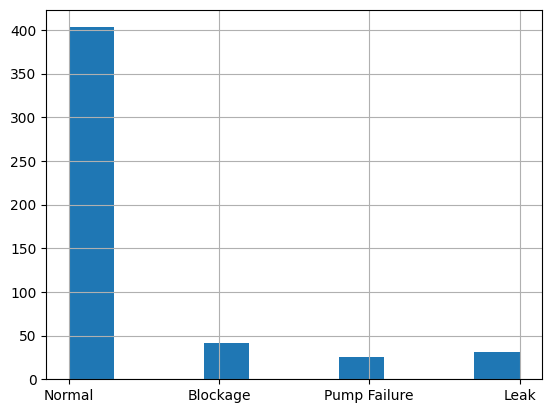

In [11]:
df.Event_Type.hist()

## 3. Transformaciones (Imputación, Encoding)

In [12]:
df.isnull().sum()

Well_ID                 25
Date                    25
Time                    25
Pressure                25
Temperature             25
Flow_Rate               25
Pump_Speed              25
Gas_Oil_Ratio           25
Water_Cut               25
Vibration               25
Event_Type               0
Maintenance_Required    25
Downtime                25
dtype: int64

In [13]:
df.Pressure.describe()

count     475.000000
mean     2960.284279
std      1169.230972
min      1001.771126
25%      1920.023988
50%      3021.461026
75%      3966.937400
max      4990.997556
Name: Pressure, dtype: float64

In [14]:
from sklearn.impute import SimpleImputer


## 4. Modelamiento

In [ ]:
# Carga de librerías para modelos

## 5. Evaluación